# PC013 Bloomberg - Improving Indian Farming - Model Selection

### Imports

In [32]:
import numpy as np 
import pandas as pd
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, BayesianRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
loc = '../data/'
rainfall=pd.read_csv(loc + 'rainfallyearly.csv', thousands=',')
average_gdp=pd.read_csv(loc + 'AnnualStateGDP2018.csv', thousands=',')
loan_default_rates=pd.read_csv(loc + 'loan_default_rates.csv', thousands=',')
outstanding_liabilities=pd.read_csv(loc + 'OutstandingLiabilitiesbyState20162017.csv', thousands=',')
roads=pd.read_csv(loc + 'Roads_2013.csv',encoding='utf8', engine='python', thousands=',')
poverty_line=pd.read_csv(loc + 'Ruralpercentagebelowpovertyline20112012.csv', thousands=',')

### PreProcessing

In [3]:
poverty_line.columns=['State','Percent Below Poverty Line']

In [4]:
roads.columns=['State','National Highways','State Highways','PWD Roads','Urban Roads','Project Roads','Rural Roads']
roads['stripped']=roads['State'].apply(lambda x: x.strip())
roads['State']=roads['stripped']
roads.drop('stripped',inplace=True,axis=1)

In [5]:
outstanding_liabilities.columns=['State','Liabilities Billions of Rupees']

In [6]:
loan_default_rates.columns=['State','Year','NPA_Loans_Ratio','Recovery_Ratio']

In [7]:
average_gdp.columns=['State','Nominal GDP INR','Nominal GDP USD']

In [8]:
combined_data=average_gdp.merge(outstanding_liabilities)

In [9]:
combined_data=combined_data.merge(loan_default_rates[loan_default_rates['Year']==2016])

In [10]:
combined_data.drop('Year',inplace=True,axis=1)

In [11]:
combined_data=combined_data.merge(poverty_line)

In [12]:
combined_data = combined_data[combined_data.NPA_Loans_Ratio != 0]

In [13]:
X = combined_data[[u'Nominal GDP INR', u'Nominal GDP USD', u'Liabilities Billions of Rupees', u'Percent Below Poverty Line']]

In [14]:
y = combined_data[u'NPA_Loans_Ratio']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1)

### Simple Linear Regression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [17]:
lr_preds, y_test

(array([22.96003331]), 10    3.61
 Name: NPA_Loans_Ratio, dtype: float64)

### Ridge Regression

In [18]:
ridge = RidgeCV(alphas=(0.1,0.3,0.5,\
                        0.8,1), cv=3, \
                normalize=True)
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)

In [19]:
ridge_preds, y_test

(array([30.93869832]), 10    3.61
 Name: NPA_Loans_Ratio, dtype: float64)

### Lasso Regression

In [20]:
lasso = LassoCV(alphas=(0.1,0.3,0.5,0.8,1), cv=3, normalize=True)
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)

In [21]:
lasso_preds, y_test

(array([32.39172371]), 10    3.61
 Name: NPA_Loans_Ratio, dtype: float64)

### Random Forest Regressor

In [22]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_preds = rfr.predict(X_test)

In [23]:
rfr_preds, y_test

(array([39.03]), 10    3.61
 Name: NPA_Loans_Ratio, dtype: float64)

### Bayesian Ridge Regressor

In [24]:
brr = BayesianRidge(normalize=True)
brr.fit(X_train, y_train)
brr_preds = brr.predict(X_test)

In [25]:
brr_preds, y_test

(array([31.81231265]), 10    3.61
 Name: NPA_Loans_Ratio, dtype: float64)

## Time Series

In [61]:
data = pd.read_csv('../data/final.csv')

In [99]:
data = data.reindex(index=data.index[::-1])

In [100]:
ts = data.set_index('date')

In [101]:
%matplotlib inline

In [102]:
data

,date,cpi_combined_yoy,cpi_clothing_yoy,wholesale_prices_yoy,wholesale_food_prices_index,wholesale_nonfood_prices_index,wholesale_food_products_prices_index,price_index_baked_goods,price_index_canned_foods,price_index_dairy,...,price_index_wheat,price_index_fruits_veg,price_index_fruit,price_index_veg,price_index_pulses,price_index_milk,price_index_other_food_articles,loan_default_ratio,irrigated_areas,rural_bank_branches
41,10/2013,10.81082,9.19652,6.70391,132.6,117.8,115.3,137.6,168.1,179.6,...,213.6,282.8,212.9,367.6,229.0,221.2,229.3,43.100000,2910,419
40,11/2013,11.50527,8.89952,6.52377,133.2,115.1,115.8,138.2,170.7,181.1,...,216.7,300.3,211.8,407.7,230.3,224.0,216.8,42.850000,2910,419
39,12/2013,9.46463,8.81517,5.88236,125.6,115.4,115.3,141.9,168.3,183.2,...,219.9,237.0,199.8,282.2,229.4,225.3,213.7,42.600000,2910,419
38,1/2014,8.60421,8.66290,5.18518,122.7,116.7,114.5,142.5,175.5,185.5,...,220.2,209.0,202.4,216.8,226.9,225.7,214.8,42.350000,2910,419
37,2/2014,7.88224,8.52060,4.79705,122.2,118.1,115.1,142.4,177.6,186.1,...,220.9,202.2,206.1,197.6,224.2,229.1,212.2,42.100000,2880,447
36,3/2014,8.24644,8.48089,5.24862,122.9,118.2,116.4,145.2,174.1,186.1,...,218.1,208.4,216.6,198.4,227.7,230.1,224.7,41.850000,2880,447
35,4/2014,8.48256,8.43373,5.06446,123.1,117.3,118.2,148.2,172.8,187.0,...,212.6,225.4,229.9,220.0,228.9,230.5,252.5,41.600000,2880,447
34,5/2014,8.32554,8.38710,5.70903,126.3,117.6,118.0,150.2,166.8,189.5,...,207.7,235.5,234.6,236.6,231.2,233.6,256.9,41.350000,3227,447
33,6/2014,6.77035,8.23422,4.63215,129.7,116.9,117.5,151.6,165.0,191.1,...,207.0,248.7,228.8,272.9,231.1,237.6,259.7,41.100000,3227,476
32,7/2014,7.38738,8.27273,4.94604,136.3,117.3,117.9,153.1,165.2,192.3,...,208.8,285.6,245.8,334.0,234.1,237.7,259.7,40.850000,3227,476


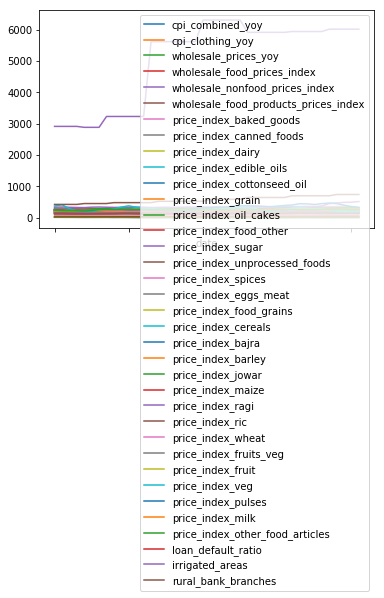

In [103]:
ts.plot()

In [104]:
from pyramid.arima import auto_arima

In [117]:
data

,date,cpi_combined_yoy,cpi_clothing_yoy,wholesale_prices_yoy,wholesale_food_prices_index,wholesale_nonfood_prices_index,wholesale_food_products_prices_index,price_index_baked_goods,price_index_canned_foods,price_index_dairy,...,price_index_wheat,price_index_fruits_veg,price_index_fruit,price_index_veg,price_index_pulses,price_index_milk,price_index_other_food_articles,loan_default_ratio,irrigated_areas,rural_bank_branches
41,10/2013,10.81082,9.19652,6.70391,132.6,117.8,115.3,137.6,168.1,179.6,...,213.6,282.8,212.9,367.6,229.0,221.2,229.3,43.100000,2910,419
40,11/2013,11.50527,8.89952,6.52377,133.2,115.1,115.8,138.2,170.7,181.1,...,216.7,300.3,211.8,407.7,230.3,224.0,216.8,42.850000,2910,419
39,12/2013,9.46463,8.81517,5.88236,125.6,115.4,115.3,141.9,168.3,183.2,...,219.9,237.0,199.8,282.2,229.4,225.3,213.7,42.600000,2910,419
38,1/2014,8.60421,8.66290,5.18518,122.7,116.7,114.5,142.5,175.5,185.5,...,220.2,209.0,202.4,216.8,226.9,225.7,214.8,42.350000,2910,419
37,2/2014,7.88224,8.52060,4.79705,122.2,118.1,115.1,142.4,177.6,186.1,...,220.9,202.2,206.1,197.6,224.2,229.1,212.2,42.100000,2880,447
36,3/2014,8.24644,8.48089,5.24862,122.9,118.2,116.4,145.2,174.1,186.1,...,218.1,208.4,216.6,198.4,227.7,230.1,224.7,41.850000,2880,447
35,4/2014,8.48256,8.43373,5.06446,123.1,117.3,118.2,148.2,172.8,187.0,...,212.6,225.4,229.9,220.0,228.9,230.5,252.5,41.600000,2880,447
34,5/2014,8.32554,8.38710,5.70903,126.3,117.6,118.0,150.2,166.8,189.5,...,207.7,235.5,234.6,236.6,231.2,233.6,256.9,41.350000,3227,447
33,6/2014,6.77035,8.23422,4.63215,129.7,116.9,117.5,151.6,165.0,191.1,...,207.0,248.7,228.8,272.9,231.1,237.6,259.7,41.100000,3227,476
32,7/2014,7.38738,8.27273,4.94604,136.3,117.3,117.9,153.1,165.2,192.3,...,208.8,285.6,245.8,334.0,234.1,237.7,259.7,40.850000,3227,476


In [122]:
train, test = data[:37], data[37:]

In [123]:
train.set_index('date', inplace=True)

In [124]:
test.set_index('date', inplace=True)

In [125]:
y_train = train.loan_default_ratio
X_train = train[[u'cpi_combined_yoy', u'cpi_clothing_yoy', u'wholesale_prices_yoy',
       u'wholesale_food_prices_index', u'wholesale_nonfood_prices_index',
       u'wholesale_food_products_prices_index', u'price_index_baked_goods',
       u'price_index_canned_foods', u'price_index_dairy',
       u'price_index_edible_oils', u'price_index_cottonseed_oil',
       u'price_index_grain', u'price_index_oil_cakes',
       u'price_index_food_other', u'price_index_sugar',
       u'price_index_unprocessed_foods', u'price_index_spices',
       u'price_index_eggs_meat', u'price_index_food_grains',
       u'price_index_cereals', u'price_index_bajra', u'price_index_barley',
       u'price_index_jowar', u'price_index_maize', u'price_index_ragi',
       u'price_index_ric', u'price_index_wheat', u'price_index_fruits_veg',
       u'price_index_fruit', u'price_index_veg', u'price_index_pulses',
       u'price_index_milk', u'price_index_other_food_articles', u'irrigated_areas', u'rural_bank_branches']]

y_test = test.loan_default_ratio
X_test = test[[u'cpi_combined_yoy', u'cpi_clothing_yoy', u'wholesale_prices_yoy',
       u'wholesale_food_prices_index', u'wholesale_nonfood_prices_index',
       u'wholesale_food_products_prices_index', u'price_index_baked_goods',
       u'price_index_canned_foods', u'price_index_dairy',
       u'price_index_edible_oils', u'price_index_cottonseed_oil',
       u'price_index_grain', u'price_index_oil_cakes',
       u'price_index_food_other', u'price_index_sugar',
       u'price_index_unprocessed_foods', u'price_index_spices',
       u'price_index_eggs_meat', u'price_index_food_grains',
       u'price_index_cereals', u'price_index_bajra', u'price_index_barley',
       u'price_index_jowar', u'price_index_maize', u'price_index_ragi',
       u'price_index_ric', u'price_index_wheat', u'price_index_fruits_veg',
       u'price_index_fruit', u'price_index_veg', u'price_index_pulses',
       u'price_index_milk', u'price_index_other_food_articles', u'irrigated_areas', u'rural_bank_branches']]

In [126]:
model = auto_arima(y_train, exogenous=X_train, start_p=1, start_q=1, start_P=1, start_Q=1,
                  max_p=5, max_q=5, max_P=5, max_Q=5, seasonal=True,
                  stepwise=True, suppress_warnings=True, D=10, max_D=10,
                  error_action='ignore')


In [147]:
preds, conf_int = model.predict(exogenous=X_test, n_periods=y_test.shape[0], return_conf_int=True)

In [156]:
conf_int = conf_int[::-1]

In [162]:
preds = preds[::-1]

In [163]:
y_test

date
11/2016    47.34
12/2016    47.74
1/2017     48.14
2/2017     48.54
3/2017     48.94
Name: loan_default_ratio, dtype: float64

In [165]:
import matplotlib.pyplot as plt

Text(0.5,0,'Month Period 10/2013 - 03/2017')

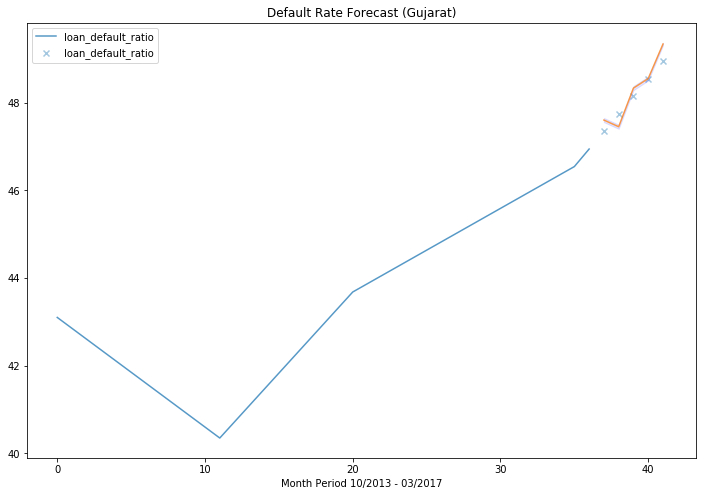

In [177]:
x_axis = np.arange(y_train.shape[0] + preds.shape[0])
x_years = x_axis +0  # Year starts at 1821

plt.figure(figsize=(12,8))
plt.plot(x_years[x_axis[:y_train.shape[0]]], y_train, alpha=0.75)
plt.plot(x_years[x_axis[y_train.shape[0]:]], preds, alpha=0.75)  # Forecasts
plt.scatter(x_years[x_axis[y_train.shape[0]:]], y_test,
            alpha=0.4, marker='x')  # Test data
plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.title("Default Rate Forecast (Gujarat)")
plt.legend()
plt.xlabel("Month Period 10/2013 - 03/2017")

In [173]:
print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(y_test, preds)))

Test RMSE: 0.262
